<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://drive.google.com/uc?export=view&id=1Ha4ZjgvrlWHQ5vV_VydBkxiFXdgDn8TT" width = "200" align="center"/>


El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [3]:
# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [44]:
# cargar datos
data = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**:
    * Descripción: Nombre de la especie de Iris.
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**:
    * Descripción: largo del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**:
    * Descripción: ancho del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**:
    * Descripción: largo del pétalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**:
    * Descripción: ancho del pépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores `nan`.

In [45]:
data["species"]=data["species"].str.lower().fillna("default").str.strip()

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [ ]:
columnas=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data[columnas].fillna(0,inplace=True)

In [ ]:
columnas=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sns.boxplot(data=data[columnas])
plt.title('Largo y ancho de Petalos y Sepalos')
plt.show()

Se supone que deberia mostrar el grafico, pero el codigo deberia ser algo asi.(No se como se arregla :c)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [ ]:
rango={'sepal_length': (4,7),
       'sepal_width': (2,4.5),
       "petal_length": (1,7),
       "petal_width":(0.1,2.5)}

for carac,(min,max) in rango.items():
  data["label"]=data.apply(lambda row: "fuera de rango" if int(row[carac])<min or int(row[carac])>max else"",axis=1)
data.head()

4. Realice un gráfico de *sepal_length* vs *petal_length* y otro de *sepal_width* vs *petal_width* categorizados por la etiqueta **label**. Concluya sus resultados.

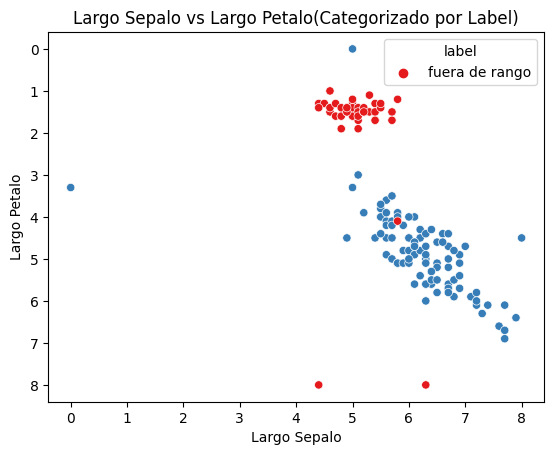

In [127]:
sns.scatterplot(data=data,x="sepal_length",y="petal_length",hue="label",palette="Set1")
plt.title("Largo Sepalo vs Largo Petalo(Categorizado por Label)")
plt.xlabel("Largo Sepalo")
plt.ylabel("Largo Petalo")
plt.show()

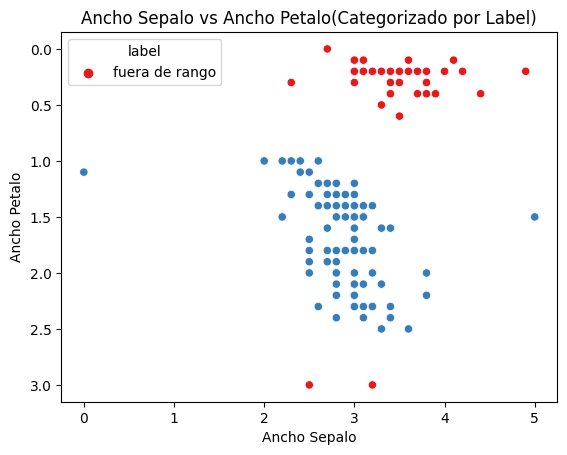

In [128]:
sns.scatterplot(data=data,x="sepal_width",y="petal_width",hue="label",palette="Set1")
plt.title("Ancho Sepalo vs Ancho Petalo(Categorizado por Label)")
plt.xlabel("Ancho Sepalo")
plt.ylabel("Ancho Petalo")
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepal_length* vs *petal_length* categorizados por la etiqueta **species**.

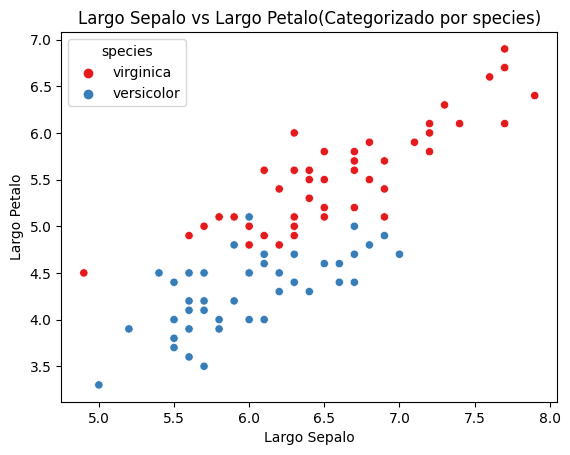

In [148]:
filtro=data.copy().loc[lambda x: x["species"]!="default"]
for carac,(min,max) in rango.items():
  filtro=filtro[(filtro[carac].astype(int)>=min) & (filtro[carac].astype(int)<=max)]

sns.scatterplot(data=filtro,x="sepal_length",y="petal_length",hue="species",palette="Set1")
plt.title("Largo Sepalo vs Largo Petalo(Categorizado por species)")
plt.xlabel("Largo Sepalo")
plt.ylabel("Largo Petalo")
plt.show()